In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [148]:
df=pd.read_csv(r"/content/Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [150]:
#checking for misisng values
df.isnull().sum()


RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [151]:
df['Card Type'].value_counts()

Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

In [152]:
#Target variable is exited
#dropping irrelevant variables


<Axes: xlabel='Exited', ylabel='count'>

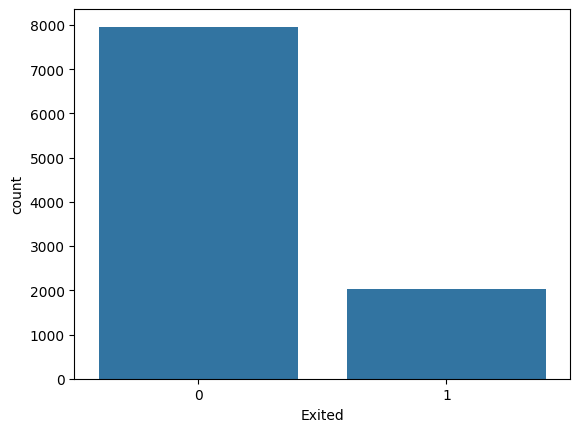

In [153]:
#performing EDA
sns.countplot(x=df['Exited'])

In [154]:
from pandas_profiling import ProfileReport
profile=ProfileReport(df)
profile

<Axes: >

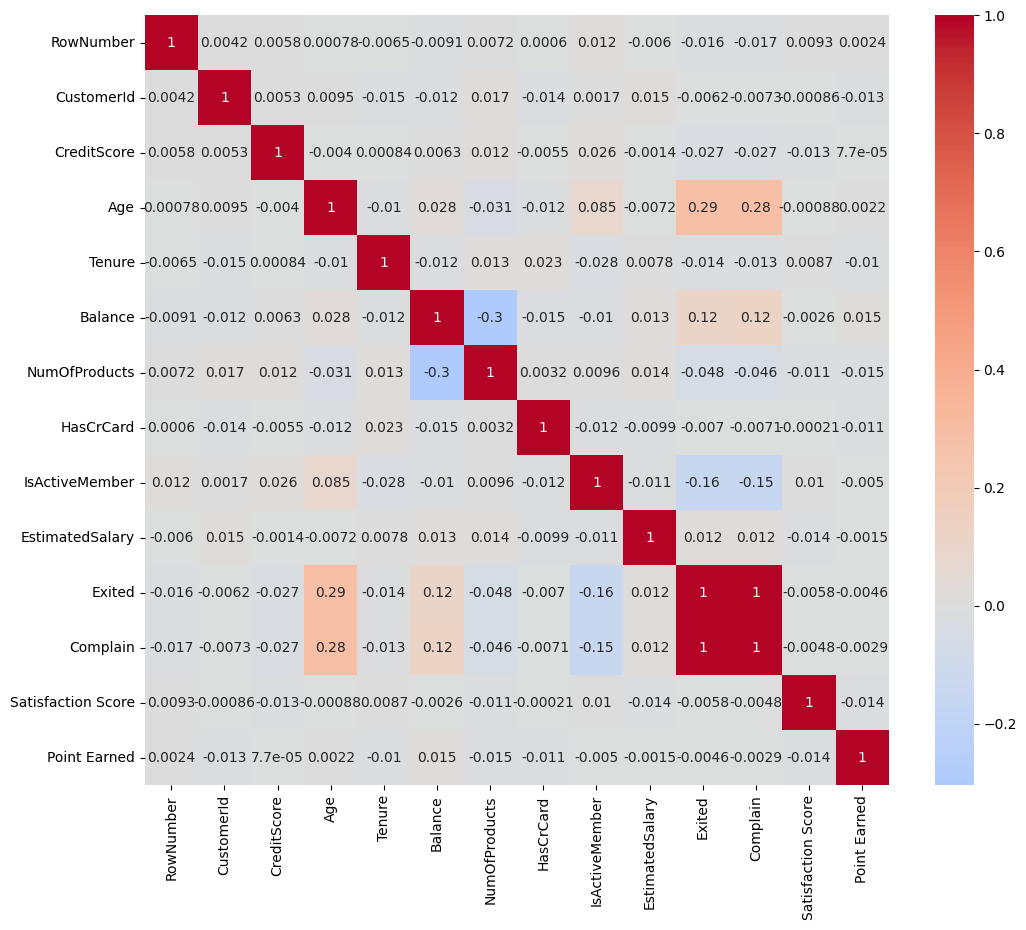

In [155]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_columns]

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', center=0)


In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Encoding
le_geography = LabelEncoder()
df['Geography'] = le_geography.fit_transform(df['Geography'])

le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

le_card_type = LabelEncoder()
df['Card Type'] = le_card_type.fit_transform(df['Card Type'])


X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df['Exited']




In [157]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()


In [158]:
#scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_shap_train=X_train
X_shap_test=X_test



Accuracy: 0.999
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



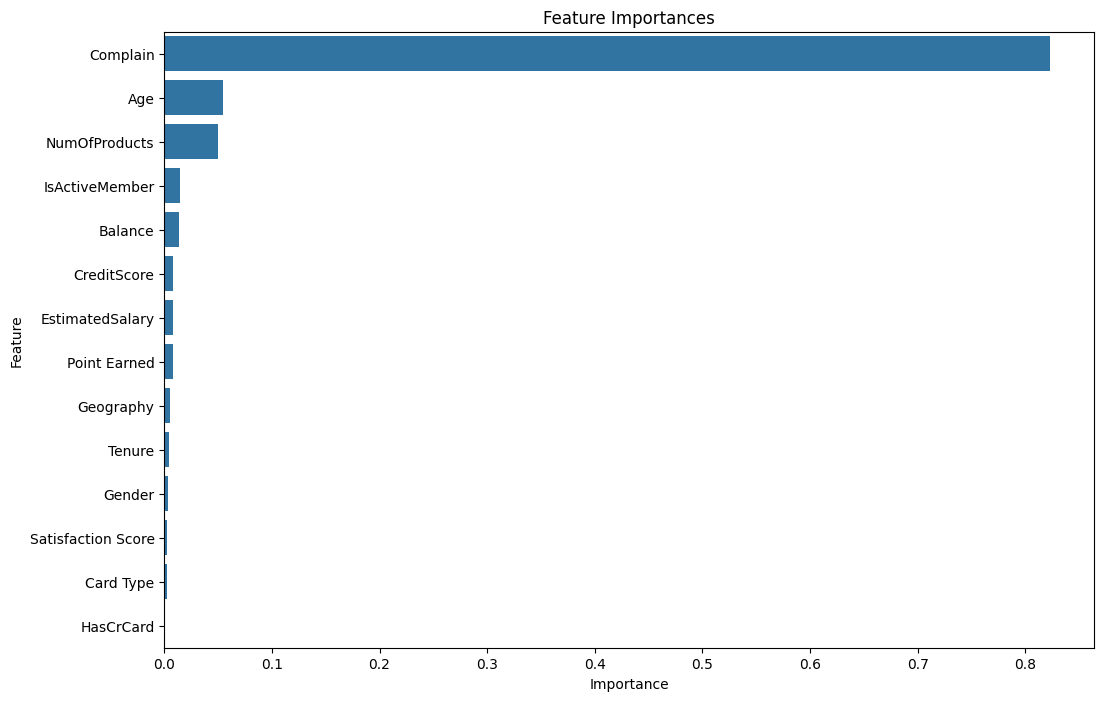

In [159]:
# Build and train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)




In [ ]:
#scores
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


In [ ]:
feature_importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()


In [160]:
X_train


array([[ 0.35649971, -0.9055496 ,  0.91324755, ..., -0.72001005,
        -1.34072928, -0.43019311],
       [-0.20389777,  0.30164867,  0.91324755, ...,  0.70434217,
         0.45064178,  1.56590792],
       [-0.96147213,  1.50884694,  0.91324755, ...,  0.70434217,
         1.34632732, -1.24374877],
       ...,
       [ 0.86500853, -0.9055496 , -1.09499335, ...,  1.41651828,
         1.34632732,  0.31667765],
       [ 0.15932282, -0.9055496 ,  0.91324755, ..., -0.00783394,
        -1.34072928,  0.32556897],
       [ 0.47065475,  0.30164867,  0.91324755, ...,  0.70434217,
        -1.34072928,  0.14329694]])

In [161]:
from sklearn.decomposition import PCA



In [162]:
X_train.shape

(8000, 14)

In [163]:
for i in range(1,15):
    pca=PCA(n_components=i)
    X_train_trf=pca.fit_transform(X_train)
    X_test_trf=pca.transform(X_test)

    model.fit(X_train_trf, y_train)
    y_pred=model.predict(X_test_trf)
    print(accuracy_score(y_test,y_pred))

0.8685
0.958
0.9745
0.976
0.9765
0.9765
0.9775
0.979
0.978
0.9785
0.9785
0.981
0.9885
0.999


In [164]:
#so it is evident from the data that using all components yields the best possible predictions for the model

In [165]:
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.999


In [166]:
X_train_trf

array([[-1.84865407,  0.09883388,  0.10115678, ..., -0.59277073,
         0.09893785,  0.73155764],
       [-0.39512237, -0.31383745,  0.63841004, ..., -1.56742923,
         0.96447212, -0.40649463],
       [ 1.37682755, -0.69067703, -1.14490437, ..., -0.87533516,
         0.18923599,  1.63317031],
       ...,
       [-0.53418514,  3.18141582, -0.32439486, ..., -1.04322722,
         1.15128139,  0.57472083],
       [ 2.52383619, -0.65582354, -1.25924499, ..., -0.69562232,
         0.94158121,  0.44436376],
       [ 1.03479427, -1.40661068,  1.86498078, ..., -0.86564437,
        -0.01123796, -0.67402246]])

## REDUCING THE NUMBER OF COMPONENTS TO 3
#### as accuracy is still great

In [167]:
pca=PCA(n_components=3)

In [168]:
pca.fit_transform(X_train)
pca.transform(X_test)


array([[-0.44269669, -0.53716387, -0.31648952],
       [-1.5498862 ,  0.73246649,  0.88974447],
       [-0.49997892,  1.40193239, -0.33720733],
       ...,
       [ 1.19856023,  1.72139632, -0.90383058],
       [ 0.33036928,  0.25002449, -1.37080989],
       [ 1.50822372, -0.32948072,  0.67384017]])

#### Plotting in 3D

In [169]:

import plotly.express as px
y_train_trf= y_train.astype(str)
fig=px.scatter_3d(x=X_train[:,0],y=X_train[:,1],z=X_train[:,2],color=y_train)
fig.update_layout(margin=dict(l=20,r=20,b=20,t=20))
fig.show()

In [170]:
components = pca.components_
print("Principal Components:\n", components)

Principal Components:
 [[-0.05802779  0.13501656 -0.13264824  0.40685138 -0.05075363  0.50645143
  -0.440615   -0.05079426 -0.16726844  0.01838384  0.54987316 -0.01715674
  -0.08984528  0.02110383]
 [-0.04612505 -0.03886478 -0.35965359  0.4357936   0.02630971 -0.45744655
   0.51870231 -0.01446765 -0.08540357  0.07056855  0.41971157 -0.02910916
   0.08673428 -0.03290341]
 [ 0.26201709  0.19540223  0.13999819  0.42464493 -0.24477457  0.00950096
   0.01709896 -0.23771633  0.7283447  -0.15151636 -0.10924107  0.03158424
  -0.00212441 -0.10028463]]


In [172]:
import shap
shap.initjs

<function shap.plots._force.initjs()>

In [173]:
explainer=shap.Explainer(model)
shap_values=explainer(X_test_copy)


In [174]:
np.shape(shap_values.values)

(2000, 14, 2)

In [175]:
X_test_copy

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
6252,596,1,1,32,3,96709.07,2,0,0,41788.37,0,1,1,709
4684,623,0,1,43,1,0.00,2,1,1,146379.30,0,2,3,508
1731,601,2,0,44,4,0.00,2,1,0,58561.31,0,1,1,281
4742,506,1,1,59,8,119152.10,2,1,1,170679.74,0,2,3,979
4521,560,2,0,27,7,124995.98,1,1,1,114669.79,0,5,3,457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,602,1,0,53,5,98268.84,1,0,1,45038.29,1,5,2,813
8285,609,0,1,25,10,0.00,1,0,1,109895.16,0,2,2,652
7853,730,0,0,47,7,0.00,1,1,0,33373.26,1,2,2,504
1095,692,0,1,29,4,0.00,1,1,0,76755.99,1,3,2,686


In [176]:

plt.figure(figsize=(16, 10))

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

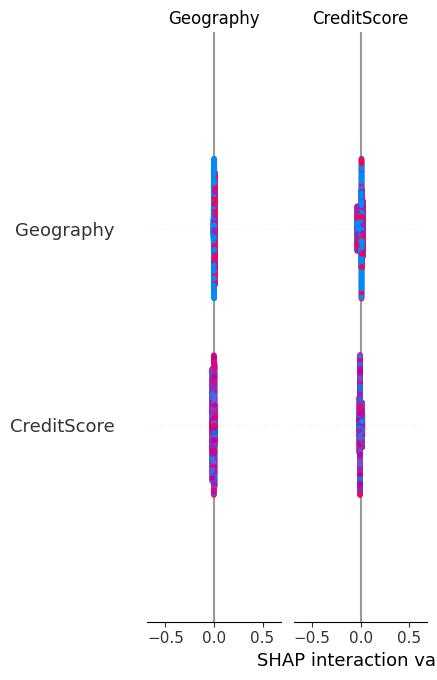

In [177]:

plt.figure(figsize=(16, 10))
shap.summary_plot(shap_values, X_test_copy, feature_names=X_test_copy.columns)


In [178]:
np.shape(shap_values.values)

(2000, 14, 2)

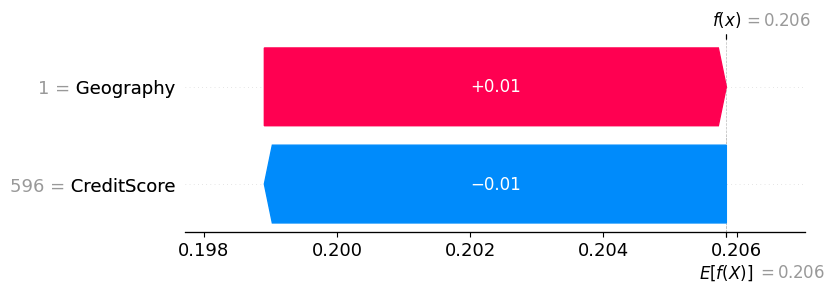

In [179]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_copy)

# Select the SHAP values for the positive class (1)
shap_values_class_1 = shap_values[2]

# Select a specific instance for the waterfall plot
instance_index = 0  # Change this index to select a different instance
instance = X_test_copy.iloc[instance_index]

# Generate waterfall plot
shap.waterfall_plot(shap.Explanation(values=shap_values_class_1[instance_index],
                                     base_values=explainer.expected_value[1],
                                     data=instance,
                                     feature_names=X_test_copy.columns.tolist()))